<a href="https://colab.research.google.com/github/uniesecruz/EnergyplusAPI/blob/main/EnergyplusAPI_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
!chmod +x /content/drive/MyDrive/ep_drive/EnergyPlus-9.6.0-f420c06a69-Linux-Ubuntu18.04-x86_64.sh
!sudo /content/drive/MyDrive/ep_drive/EnergyPlus-9.6.0-f420c06a69-Linux-Ubuntu18.04-x86_64.sh

#!pip install wurlitzer

#print('\n- Check EnergyPlus Version')
#!energyplus -version


- Check EnergyPlus Version
/bin/bash: energyplus: command not found


In [ ]:
# setting
#%load_ext wurlitzer
import sys
import os
import shutil
sys.path.insert(0, '/content/drive/MyDrive/usr/local')
from pyenergyplus.api import EnergyPlusAPI

In [ ]:
# you should connect your google drive
OUTPUT_PATH = '/content/drive/MyDrive/ep_drive/output'
if os.path.exists(OUTPUT_PATH): shutil.rmtree(OUTPUT_PATH)
if not os.path.exists(OUTPUT_PATH):os.makedirs(OUTPUT_PATH)

In [ ]:
EPW_PATH = r'/content/drive/MyDrive/ep_drive/epw/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw'
IDF_PATH = r'/content/drive/MyDrive/ep_drive/idf/2ZoneDataCenterHVAC_wEconomizer.idf'
EP_CL = ['-d', OUTPUT_PATH, '-w', EPW_PATH, IDF_PATH]

In [ ]:
# Example 1

def dummy_callback_function(state_argument):
    pass

In [ ]:
api = EnergyPlusAPI()

In [ ]:
state=api.state_manager.new_state()

In [ ]:
api.runtime.callback_begin_new_environment(state,dummy_callback_function)

In [ ]:

api.runtime.run_energyplus(state,EP_CL)

EnergyPlus Starting
EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.12.08 09:54
Initializing Response Factors
Calculating CTFs for "EXT-WALLS"
Calculating CTFs for "FLOOR"
Calculating CTFs for "PARTITION"
Calculating CTFs for "PLENUM FLOOR"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Initializing Internal Heat Gains
Initializing Interior Solar Distribution
Initializing Interior

EnergyPlus Completed Successfully.


0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r'/content/drive/MyDrive/ep_drive/output/eplusssz.csv', 
               parse_dates=[0],
               index_col=[0]
             
              )


In [ ]:
df.head()

,WEST ZONE AIR SYSTEM:DesPer 1:Des Heat Mass Flow [kg/s],WEST ZONE AIR SYSTEM:DesPer 1:Des Heat Cap [W],WEST ZONE AIR SYSTEM:DesPer 1:Des Cool Mass Flow [kg/s],WEST ZONE AIR SYSTEM:DesPer 1:Des Sens Cool Cap [W],WEST ZONE AIR SYSTEM:DesPer 1:Des Tot Cool Cap [W],WEST ZONE AIR SYSTEM:DesPer 2:Des Heat Mass Flow [kg/s],WEST ZONE AIR SYSTEM:DesPer 2:Des Heat Cap [W],WEST ZONE AIR SYSTEM:DesPer 2:Des Cool Mass Flow [kg/s],WEST ZONE AIR SYSTEM:DesPer 2:Des Sens Cool Cap [W],WEST ZONE AIR SYSTEM:DesPer 2:Des Tot Cool Cap [W],EAST ZONE AIR SYSTEM:DesPer 1:Des Heat Mass Flow [kg/s],EAST ZONE AIR SYSTEM:DesPer 1:Des Heat Cap [W],EAST ZONE AIR SYSTEM:DesPer 1:Des Cool Mass Flow [kg/s],EAST ZONE AIR SYSTEM:DesPer 1:Des Sens Cool Cap [W],EAST ZONE AIR SYSTEM:DesPer 1:Des Tot Cool Cap [W],EAST ZONE AIR SYSTEM:DesPer 2:Des Heat Mass Flow [kg/s],EAST ZONE AIR SYSTEM:DesPer 2:Des Heat Cap [W],EAST ZONE AIR SYSTEM:DesPer 2:Des Cool Mass Flow [kg/s],EAST ZONE AIR SYSTEM:DesPer 2:Des Sens Cool Cap [W],EAST ZONE AIR SYSTEM:DesPer 2:Des Tot Cool Cap [W]
Time,,,,,,,,,,,,,,,,,,,,
00:15:00,0.0,0.0,3.351885,0.0,0.0,0.0,0.0,6.074225,59606.04,154765.2,0.0,0.0,48.75181,0.0,0.0,0.0,0.0,50.54710,496016.0,1224081.0
00:30:00,0.0,0.0,2.882392,0.0,0.0,0.0,0.0,6.071465,58599.75,153684.8,0.0,0.0,48.66599,0.0,0.0,0.0,0.0,50.54459,487839.5,1215611.0
00:45:00,0.0,0.0,2.412898,0.0,0.0,0.0,0.0,6.068692,57594.23,152605.0,0.0,0.0,48.59877,0.0,0.0,0.0,0.0,50.54205,479663.6,1207142.0
01:00:00,0.0,0.0,1.943403,0.0,0.0,0.0,0.0,6.065921,56589.63,151526.2,0.0,0.0,48.52520,0.0,0.0,0.0,0.0,50.53948,471488.3,1198673.0
01:15:00,0.0,0.0,1.943357,0.0,0.0,0.0,0.0,6.063178,55912.13,150785.2,0.0,0.0,48.50803,0.0,0.0,0.0,0.0,50.53693,466030.7,1193007.0


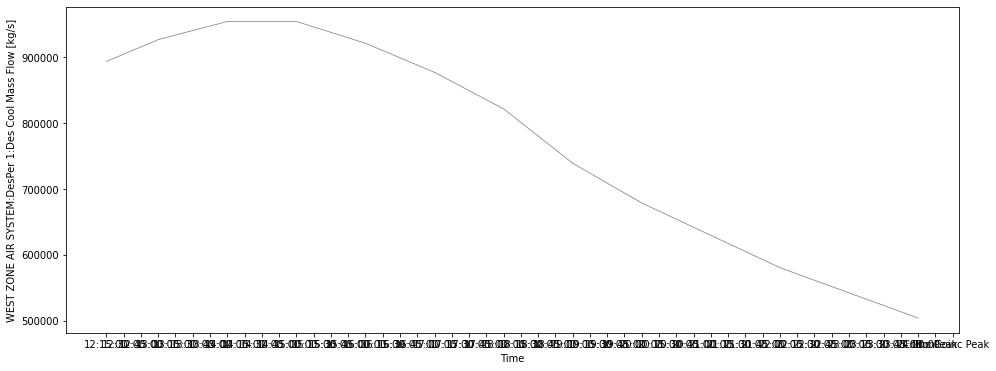

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df['EAST ZONE AIR SYSTEM:DesPer 2:Des Sens Cool Cap [W]'][48:],  
        color='grey',
        linewidth=0.75
       )
ax.set_xlabel('Time')
ax.set_ylabel('WEST ZONE AIR SYSTEM:DesPer 1:Des Cool Mass Flow [kg/s]')  
plt.show()